In [14]:
!cp 0-conv_forward.py 1-pool_forward.py
!chmod +x *.py
#~/hb/holbertonschool-machine_learning/supervised_learning/0x07-cnn

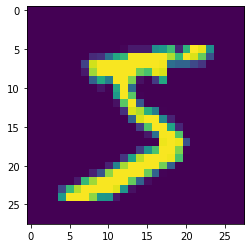

(50000, 26, 26, 2)


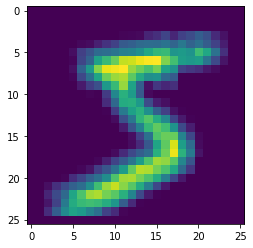

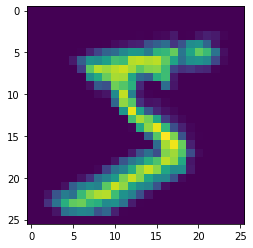

In [12]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#conv_forward = __import__('0-conv_forward').conv_forward
def conv_forward(A_prev, W, b, activation, padding="same", stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = A_prev.shape
    kh, kw, kc, knc = W.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + int(kh%2==0)
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + int(kw%2==0)

    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw, knc))
    new = np.pad(A_prev, ((0, 0), (imghp, imghp),
                          (imgwp, imgwp), (0, 0)),
                 'constant', constant_values=0)
    for k in range(knc):
        for i in range(imgh):
            for j in range(imgw):
                output[:, i, j, k] = np.sum(new[:,
                                                i*sh:i*sh+kh,
                                                j*sw:j*sw+kw, :]
                                            * W[..., k],
                                            axis=(1, 2, 3))
    return activation(output)

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_c = X_train.reshape((-1, h, w, 1))

    W = np.random.randn(3, 3, 1, 2)
    b = np.random.randn(1, 1, 1, 2)

    def relu(Z):
        return np.maximum(Z, 0)

    plt.imshow(X_train[0])
    plt.show()
    A = conv_forward(X_train_c, W, b, relu, padding='valid')
    print(A.shape)
    plt.imshow(A[0, :, :, 0])
    plt.show()
    plt.imshow(A[0, :, :, 1])
    plt.show()

(50000, 28, 28, 2)


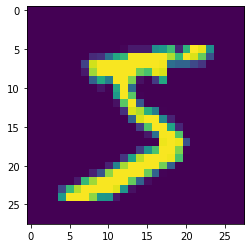

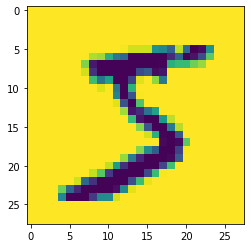

In [ ]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#pool_forward = __import__('1-pool_forward').pool_forward
def pool_forward(A_prev, kernel_shape, stride=(1, 1), mode='max'):
    """ doc """
    m, imgh, imgw, c = A_prev.shape
    kh, kw = kernel_shape
    sh, sw = stride
    imgh, imgw = (imgh-kh)//sh + 1, (imgw-kw)//sw + 1
    output = np.zeros((m, imgh, imgw, c))

    for i in range(imgh):
        for j in range(imgw):
            if mode == 'max':
                output[:, i, j, :] = np.max(A_prev[:,
                                                   i*sh:i*sh+kh,
                                                   j*sw:j*sw+kw, :],
                                            axis=(1, 2))
            if mode == 'avg':
                output[:, i, j, :] = np.average(A_prev[:,
                                                       i*sh:i*sh+kh,
                                                       j*sw:j*sw+kw, :],
                                                axis=(1, 2))
    return output

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_a = X_train.reshape((-1, h, w, 1))
    X_train_b = 1 - X_train_a
    X_train_c = np.concatenate((X_train_a, X_train_b), axis=3)

    print(X_train_c.shape)
    plt.imshow(X_train_c[0, :, :, 0])
    plt.show()
    plt.imshow(X_train_c[0, :, :, 1])
    plt.show()
    A = pool_forward(X_train_c, (2, 2), stride=(2, 2))
    print(A.shape)
    plt.imshow(A[0, :, :, 0])
    plt.show()
    plt.imshow(A[0, :, :, 1])
    plt.show()